# Entrainement du model final, predictions et embeddings

### Chargement des ressources et extraction des données

In [1]:
import pandas as pd
# Merging des données
X_train = pd.read_csv('../../X_train.csv', index_col=0)
y_train = pd.read_csv("../../Y_train.csv", index_col=0)
df = pd.concat([X_train, y_train], axis=1)
df.head()

,designation,description,productid,imageid,prdtypecode
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,10
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,2280
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,50
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,1280
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,2705


In [2]:
train_df = pd.read_csv('final_train_split.csv')
test_df = pd.read_csv('final_test_split.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16984 entries, 0 to 16983
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   designation       16984 non-null  object
 1   description       10992 non-null  object
 2   productid         16984 non-null  int64 
 3   imageid           16984 non-null  int64 
 4   target            16984 non-null  int64 
 5   text              16984 non-null  object
 6   tokens            16984 non-null  object
 7   padded_sequences  16984 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.0+ MB


In [43]:
#import pandas as pd

# Création de y_train
#train_productids = train_df['productid'].values
#y_train_final = df[df['productid'].isin(train_productids)].sort_values(by='productid')['prdtypecode']

# Création de y_test
#test_productids = test_df['productid'].values
#y_test_final = df[df['productid'].isin(test_productids)].sort_values(by='productid')['prdtypecode']

In [3]:
# transformations des colonnes nécessaires en chaines de caractères
cols_cat = ['productid', 'imageid', 'prdtypecode']
df[cols_cat] = df[cols_cat].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84916 entries, 0 to 84915
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  object
 3   imageid      84916 non-null  object
 4   prdtypecode  84916 non-null  object
dtypes: object(5)
memory usage: 3.9+ MB


In [4]:
# Récupérations des labels
prdtypecodes = list(df['prdtypecode'].unique())
print("Modalités d'origine des {} produits :\n".format(len(prdtypecodes)))
print(prdtypecodes)

Modalités d'origine des 27 produits :

['10', '2280', '50', '1280', '2705', '2522', '2582', '1560', '1281', '1920', '2403', '1140', '2583', '1180', '1300', '2462', '1160', '2060', '40', '60', '1320', '1302', '2220', '2905', '2585', '1940', '1301']


In [5]:
# Ajout du mapping des classes pour les images
classe_images = pd.read_csv('class_images_mapping.csv')
classe_images.rename(columns={'Class Name': 'prdtypecode', 'label': 'class_image'}, inplace=True)
classe_images

,prdtypecode,Label
0,10,0
1,1140,1
2,1160,2
3,1180,3
4,1280,4
5,1281,5
6,1300,6
7,1301,7
8,1302,8
9,1320,9


In [6]:
df.columns
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84916 entries, 0 to 84915
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  object
 3   imageid      84916 non-null  object
 4   prdtypecode  84916 non-null  object
dtypes: object(5)
memory usage: 3.9+ MB


In [7]:
# Convertir les colonnes en chaînes de caractères si ce n'est pas déjà le cas
df['prdtypecode'] = df['prdtypecode'].astype(str)
classe_images['prdtypecode'] = classe_images['prdtypecode'].astype(str)

# Création d'un dictionnaire associant les anciennes valeurs aux nouvelles valeurs
mapping_dict = dict(zip(classe_images['prdtypecode'], classe_images['Label']))

# Remplacement des labels dans le DataFrame df
df['target'] = df['prdtypecode'].map(mapping_dict)

# Suppression de la colonne 'prdtypecode' si nécessaire
df = df.drop(columns=['prdtypecode'])

# Affichage des premières lignes du DataFrame mis à jour
print(df.head())


                                         designation  \
0  Olivia: Personalisiertes Notizbuch / 150 Seite...   
1  Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...   
2  Grand Stylet Ergonomique Bleu Gamepad Nintendo...   
3  Peluche Donald - Europe - Disneyland 2000 (Mar...   
4                               La Guerre Des Tuques   

                                         description   productid     imageid  \
0                                                NaN  3804725264  1263597046   
1                                                NaN   436067568  1008141237   
2  PILOT STYLE Touch Pen de marque Speedlink est ...   201115110   938777978   
3                                                NaN    50418756   457047496   
4  Luc a des id&eacute;es de grandeur. Il veut or...   278535884  1077757786   

   target  
0       0  
1      15  
2      25  
3       4  
4      22  


In [8]:
# Gestion des valeurs manquantes / NaN

## Nous allons remplir les valeurs manquantes dans 'description' par une chaîne vide
df['description'].fillna('', inplace = True)

# Vérification
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84916 entries, 0 to 84915
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  84916 non-null  object
 2   productid    84916 non-null  object
 3   imageid      84916 non-null  object
 4   target       84916 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 3.9+ MB


Nous avons décidé de fusionner la colonne 'designaion' et la colonne 'description' sous une même colonne 'text'. Si nous prenons uniquement la colonne 'designation' nous perdons beaucoup d'informations avec la description, même si celle-ci n'est pas tout le temps renseignée. De même, si nous prenons uniquement que la colonne descirption, nous perdons les informations fondamentales qui se trouvent dans les titres des produits. Supprimer les lignes avec les valeurs manquantes seraient aussi une erreur au vue de leur grand nombre (notre modèle auraient ainsi moins de données pour son apprentissage).

In [9]:
# Fusion des colonnes 'designation' et 'description' en une seule colonne 'text'
df['text'] = df['designation'] + ' ' + df['description'].fillna('')

# Affichage des premières lignes pour vérification
df[['text']].head()

,text
0,Olivia: Personalisiertes Notizbuch / 150 Seite...
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...
3,Peluche Donald - Europe - Disneyland 2000 (Mar...
4,La Guerre Des Tuques Luc a des id&eacute;es de...


## Pre-processing

In [10]:
import re
from html import unescape

def clean_text(text):
    text = text.lower()  # tout en minuscules
    text = unescape(text) # Suppression des balises HTML
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'[^\w\s]', '', text) # Suppression de la ponctuation
    text = re.sub(r'\d+', '', text) # Suppression des chiffres
    return text

# Nettoyage
df['text'] = df['text'].apply(clean_text)

# vérification
df['text'].head()

0    olivia personalisiertes notizbuch   seiten  pu...
1    journal des arts le n  du   lart et son marche...
2    grand stylet ergonomique bleu gamepad nintendo...
3    peluche donald  europe  disneyland  marionnett...
4    la guerre des tuques luc a des idées de grande...
Name: text, dtype: object

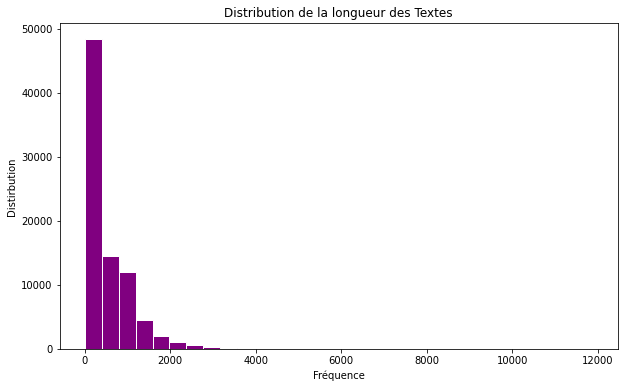

In [11]:
import matplotlib.pyplot as plt

# Calcul des différentes longueurs de texte
text_long = df['text'].apply(len)

# Visualisation
plt.figure(figsize = (10, 6))
plt.hist(text_long, bins = 30, color = 'purple', edgecolor = 'white')
plt.title('Distribution de la longueur des Textes')
plt.xlabel('Fréquence')
plt.ylabel('Distirbution')
plt.show()


D'après cet histogramme, comme nous l'avons vu dans les étapes d'analyse et de visualisation des données, la distribution varie fortement avec un pic apparent pour les textes de taille moyenne. Nous avons ainsi une grande diversité dans la quantité des textes par ligne, nous devrons y faire attention pour les modèles de deep learning qui peuvent nécessaiter une longueur d'entrée uniforme.

### Suppression des mots non significatifs

In [12]:
# Nous allons vérfier au préalable qu'il n'y a bien plus de balises HTML, URLs, et d'accents
def html_tags(text):
    return bool(re.search(r'<[^>]+>', text))

def urls(text):
    return bool(re.search(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text))

def accents(text):
    return bool(re.search(r'[àáâãäåçèéêëìíîïðñòóôõöùúûüýÿ]', text))

# Application sur un échantillon pour plus de rapidité
sample_data = df['text'].sample(100)
html_tags = sample_data.apply(html_tags).sum()
urls = sample_data.apply(urls).sum()
accents = sample_data.apply(accents).sum()

html_tags, urls, accents

(0, 0, 66)

Nous pouvons en déduire qu'il n'y a plus de balises HTML, ni d'URLs mais il y a la présence d'accents sur certains mots. Pour le deep learning et en particuliers pour les architectures modernes comme les réseaux de neuronnes profonds ou les transformers que nous pourrions utiliser par la suite, les caractères contenant un accent ne posent pas de problème, nous pouvons donc les garder. De même pour la traduction qui nous posait problème car elle demandait beaucoup de ressources en terme de temps. La plupart des modèles de traitement du langage naturel modernes peuvent être entrainés sur de vastes corpus multilingues.
Les accents ne poseront pas non plus de soucis pour la tokénisation, ce qui nous permet ainsi de garder la richesse linguistique des données et peut être bénéfique pour la performance de nos modèles par la suite.

#### Tokenisation du texte

In [13]:
import nltk
from nltk.tokenize import word_tokenize

# Fonction de tokénisation
def tokenize_text(text):
    #tokens = word_tokenize(text, language = 'french')
    tokens = word_tokenize(text)
    return tokens

# Application à la colonne 'text'
df['tokens'] = df['text'].apply(tokenize_text)

# Visualisation
df['tokens'].head()

0    [olivia, personalisiertes, notizbuch, seiten, ...
1    [journal, des, arts, le, n, du, lart, et, son,...
2    [grand, stylet, ergonomique, bleu, gamepad, ni...
3    [peluche, donald, europe, disneyland, marionne...
4    [la, guerre, des, tuques, luc, a, des, idées, ...
Name: tokens, dtype: object

In [14]:
# Premier nettoyage du texte avec les stopwords français, car la majorité du text est en FR
from nltk.corpus import stopwords
from collections import Counter

## Download des stopwords
#nltk.download('stopwords')

# Stopwords français
french_stopwords = set(stopwords.words('french'))
english_stopwords = set(stopwords.words('english'))
deutsch_stopwords = set(stopwords.words('german'))

# Fonctions
def remove_stopwords_fr(tokens):
    return [token for token in tokens if token not in french_stopwords]

def remove_stopwords_en(tokens):
    return [token for token in tokens if token not in english_stopwords]

def remove_stopwords_de(tokens):
    return [token for token in tokens if token not in deutsch_stopwords]

# Application
df['tokens'] = df['tokens'].apply(remove_stopwords_fr)
df['tokens'] = df['tokens'].apply(remove_stopwords_en)
df['tokens'] = df['tokens'].apply(remove_stopwords_de)

# Compter les mots restants
word_counts = Counter([token for sublist in df['tokens'] for token in sublist])

# Visualisation des 50 mots les plus fréquents
print(word_counts.most_common(50))

[('x', 91884), ('cm', 56192), ('couleur', 24227), ('taille', 24031), ('piscine', 22594), ('plus', 22417), ('peut', 21180), ('haute', 18591), ('qualité', 16685), ('mm', 15487), ('être', 15467), ('facile', 13076), ('enfants', 12610), ('tout', 12608), ('matériel', 12516), ('produit', 12102), ('sans', 12020), ('dimensions', 11674), ('jeu', 11161), ('bois', 10931), ('leau', 10537), ('caractéristiques', 9996), ('h', 9966), ('acier', 9900), ('sil', 9851), ('pc', 9816), ('plaît', 9668), ('comme', 9592), ('coussin', 9283), ('lumière', 9070), ('comprend', 8941), ('type', 8793), ('non', 8631), ('très', 8556), ('décoration', 8555), ('batterie', 8498), ('taie', 8366), ('g', 8357), ('led', 8345), ('cette', 8344), ('dun', 7777), ('v', 7719), ('bébé', 7714), ('poids', 7625), ('dune', 7533), ('blanc', 7453), ('mode', 7361), ('sac', 7359), ('raison', 7245), ('protection', 7210)]


Il y a encore des chiffres et des mots qui sont à supprimer.

In [15]:
# Liste supplémentaire de mots à filtrer
add_stopwords = {'x', 'cm', 'plus', 'peut', 'mm', 'être', 'tout', 'leau', 'h', 'sil', 'plaît', 'comme', 'g', 'dun', 'très', 'non', 'cette', 'v', 'dune'}

# Maj fonction
def remove_stopwords_2(tokens):
    return [token for token in tokens if token not in add_stopwords]

# Application
df['tokens'] = df['tokens'].apply(remove_stopwords_2)

# Recompter les mots restants
word_counts = Counter([token for sublist in df['tokens'] for token in sublist])

# Visualisation des 150 mots les plus fréquents
print(word_counts.most_common(150))

[('couleur', 24227), ('taille', 24031), ('piscine', 22594), ('haute', 18591), ('qualité', 16685), ('facile', 13076), ('enfants', 12610), ('matériel', 12516), ('produit', 12102), ('sans', 12020), ('dimensions', 11674), ('jeu', 11161), ('bois', 10931), ('caractéristiques', 9996), ('acier', 9900), ('pc', 9816), ('coussin', 9283), ('lumière', 9070), ('comprend', 8941), ('type', 8793), ('décoration', 8555), ('batterie', 8498), ('taie', 8366), ('led', 8345), ('bébé', 7714), ('poids', 7625), ('blanc', 7453), ('mode', 7361), ('sac', 7359), ('raison', 7245), ('protection', 7210), ('inclus', 7208), ('main', 7160), ('rc', 7120), ('temps', 7072), ('ans', 7056), ('mesure', 6990), ('neuf', 6868), ('description', 6823), ('style', 6817), ('maison', 6798), ('design', 6785), ('kg', 6741), ('pcs', 6741), ('pompe', 6688), ('hauteur', 6667), ('deau', 6639), ('contenu', 6636), ('doreiller', 6564), ('forfait', 6511), ('filtration', 6455), ('paquet', 6450), ('plastique', 6249), ('utiliser', 6221), ('couvertur

La liste des mots les plus fréquents montre maintenant des termes plus pertinents pour des descriptions de produits, tels que "couleur", "taille", "qualité", "matériel", et "produit". Mais il reste encore des mots comme "a", "peut", "être", et "plus" qui sont relativement vagues et pourraient ne pas ajouter beaucoup de valeur pour la modélisation.

In [16]:
# Liste mise à jour de mots à filtrer
add_stopwords_2 = {'sans', 'comprend', 'inclus', 'rc', 'kg', 'deau', 'contenu', 'utiliser', 'tous', 'environ', 'avant', 'si', 'permettre', 'ø', 'fait', 'facilement', 'xcm', 'w', 'p', 'permet', 'faire', 'peuvent', 'également', 'grâce', 'dji', 'utilisé', 'entre', 'convient', 'aussi', 'contre', 'sous'}

# Maj fonction
def remove_stopwords_3(tokens):
    return [token for token in tokens if token not in add_stopwords_2]

# Application
df['tokens'] = df['tokens'].apply(remove_stopwords_3)

# Recompter les mots restants
word_counts = Counter([token for sublist in df['tokens'] for token in sublist])

# Visualisation des 150 mots les plus fréquents
print(word_counts.most_common(150))


[('couleur', 24227), ('taille', 24031), ('piscine', 22594), ('haute', 18591), ('qualité', 16685), ('facile', 13076), ('enfants', 12610), ('matériel', 12516), ('produit', 12102), ('dimensions', 11674), ('jeu', 11161), ('bois', 10931), ('caractéristiques', 9996), ('acier', 9900), ('pc', 9816), ('coussin', 9283), ('lumière', 9070), ('type', 8793), ('décoration', 8555), ('batterie', 8498), ('taie', 8366), ('led', 8345), ('bébé', 7714), ('poids', 7625), ('blanc', 7453), ('mode', 7361), ('sac', 7359), ('raison', 7245), ('protection', 7210), ('main', 7160), ('temps', 7072), ('ans', 7056), ('mesure', 6990), ('neuf', 6868), ('description', 6823), ('style', 6817), ('maison', 6798), ('design', 6785), ('pcs', 6741), ('pompe', 6688), ('hauteur', 6667), ('doreiller', 6564), ('forfait', 6511), ('filtration', 6455), ('paquet', 6450), ('plastique', 6249), ('couverture', 6142), ('longueur', 6095), ('kit', 6091), ('forme', 5988), ('cadeau', 5887), ('durable', 5857), ('noël', 5826), ('pouvez', 5743), ('ma

Cette liste actualisée de mots fréquents semble déjà plus pertinente pour des descriptions de produits, bien qu'il y ait encore quelques mots qui pourraient ne pas être très utiles pour le modèle, comme "sil", "plaît", et "comme". Ces mots pourraient être considérés comme des remplisseurs dans notre contexte.

In [17]:
# Liste mise à jour de mots à filtrer
add_stopwords_3 = {'pouvez', 'toute', 'idéal', 'etc', 'bon', 'super', 'cv', 'avoir', 'chaque', 'remarque', 'bonne', 'bien', 'toutes'}

# Maj fonction
def remove_stopwords_4(tokens):
    return [token for token in tokens if token not in add_stopwords_3]

# Appliquer
df['tokens'] = df['tokens'].apply(remove_stopwords_4)

# Recompter les mots restants
word_counts = Counter([token for sublist in df['tokens'] for token in sublist])

# Visualisation des 150 mots les plus fréquents
print(word_counts.most_common(150))

[('couleur', 24227), ('taille', 24031), ('piscine', 22594), ('haute', 18591), ('qualité', 16685), ('facile', 13076), ('enfants', 12610), ('matériel', 12516), ('produit', 12102), ('dimensions', 11674), ('jeu', 11161), ('bois', 10931), ('caractéristiques', 9996), ('acier', 9900), ('pc', 9816), ('coussin', 9283), ('lumière', 9070), ('type', 8793), ('décoration', 8555), ('batterie', 8498), ('taie', 8366), ('led', 8345), ('bébé', 7714), ('poids', 7625), ('blanc', 7453), ('mode', 7361), ('sac', 7359), ('raison', 7245), ('protection', 7210), ('main', 7160), ('temps', 7072), ('ans', 7056), ('mesure', 6990), ('neuf', 6868), ('description', 6823), ('style', 6817), ('maison', 6798), ('design', 6785), ('pcs', 6741), ('pompe', 6688), ('hauteur', 6667), ('doreiller', 6564), ('forfait', 6511), ('filtration', 6455), ('paquet', 6450), ('plastique', 6249), ('couverture', 6142), ('longueur', 6095), ('kit', 6091), ('forme', 5988), ('cadeau', 5887), ('durable', 5857), ('noël', 5826), ('marque', 5735), ('bl

La liste de mots fréquents révisée montre une gamme de termes qui semblent très pertinents pour les descriptions de produits, avec des mots techniques et spécifiques comme "couleur", "taille", "acier", "lumière", et "batterie". Cependant, certains mots comme "of", "to", "cette", et "dun" pourraient encore être considérés comme des remplisseurs dans notre contexte.

In [18]:
# Liste mise à jour de mots à filtrer
final_stopwords = {'facile', 'caractéristiques', 'type', 'raison', 'forme', 'parfait', 'différent', 'différents', 'pratique', 'sert', 'ainsi', 'car', 'simple', 'nécessaire', 'hors','contient', 'légèrement'}

# Maj fonction
def final_refine_tokens(tokens):
    return [token for token in tokens if token not in final_stopwords]

# Appliquer
df['tokens'] = df['tokens'].apply(final_refine_tokens)

# Recompter les mots restants
word_counts = Counter([token for sublist in df['tokens'] for token in sublist])

# Visualisation des 150 mots les plus fréquents
print(word_counts.most_common(150))

[('couleur', 24227), ('taille', 24031), ('piscine', 22594), ('haute', 18591), ('qualité', 16685), ('enfants', 12610), ('matériel', 12516), ('produit', 12102), ('dimensions', 11674), ('jeu', 11161), ('bois', 10931), ('acier', 9900), ('pc', 9816), ('coussin', 9283), ('lumière', 9070), ('décoration', 8555), ('batterie', 8498), ('taie', 8366), ('led', 8345), ('bébé', 7714), ('poids', 7625), ('blanc', 7453), ('mode', 7361), ('sac', 7359), ('protection', 7210), ('main', 7160), ('temps', 7072), ('ans', 7056), ('mesure', 6990), ('neuf', 6868), ('description', 6823), ('style', 6817), ('maison', 6798), ('design', 6785), ('pcs', 6741), ('pompe', 6688), ('hauteur', 6667), ('doreiller', 6564), ('forfait', 6511), ('filtration', 6455), ('paquet', 6450), ('plastique', 6249), ('couverture', 6142), ('longueur', 6095), ('kit', 6091), ('cadeau', 5887), ('durable', 5857), ('noël', 5826), ('marque', 5735), ('bleu', 5724), ('drone', 5684), ('couleurs', 5642), ('voiture', 5641), ('tissu', 5441), ('système', 5

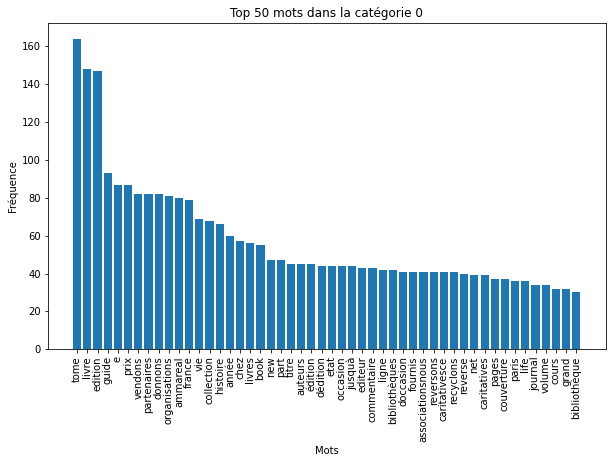

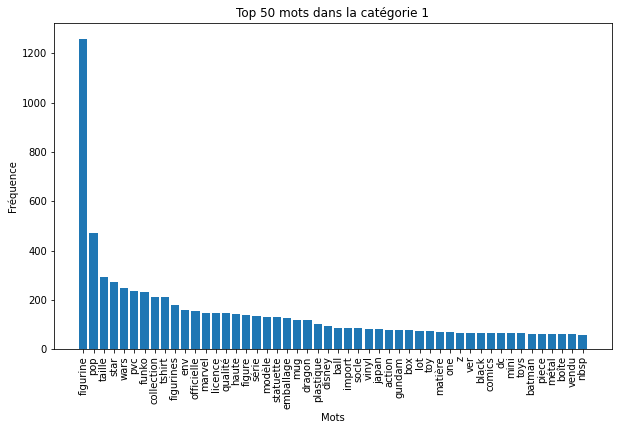

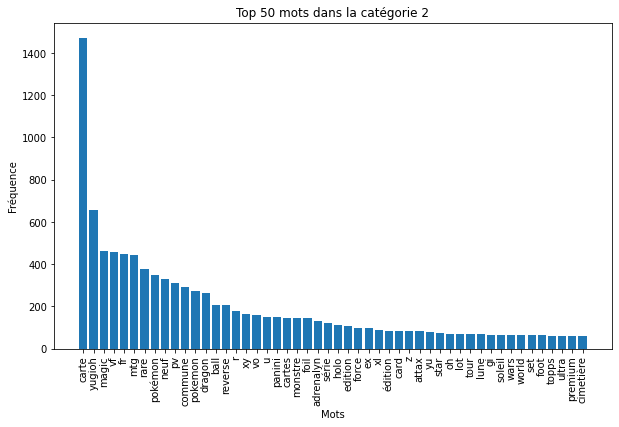

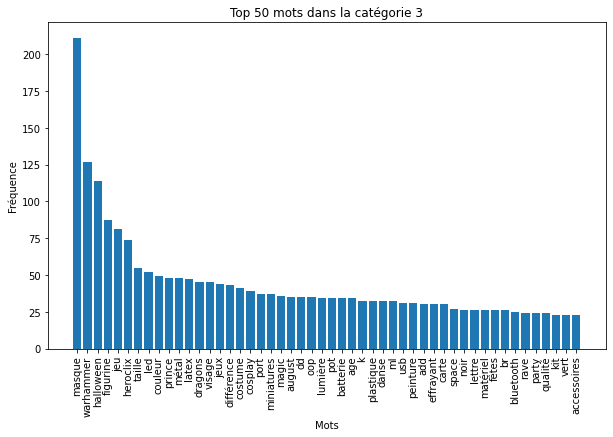

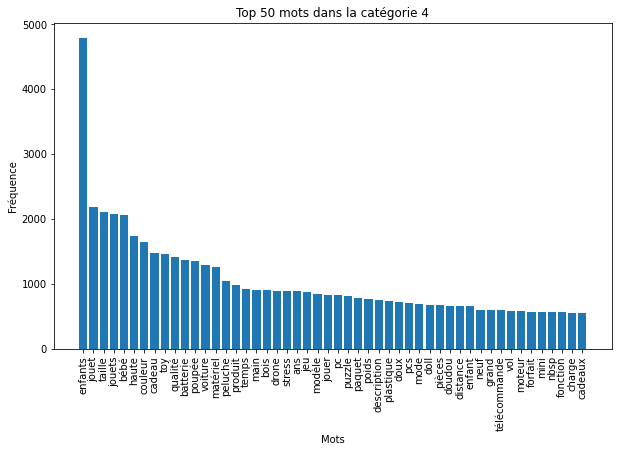

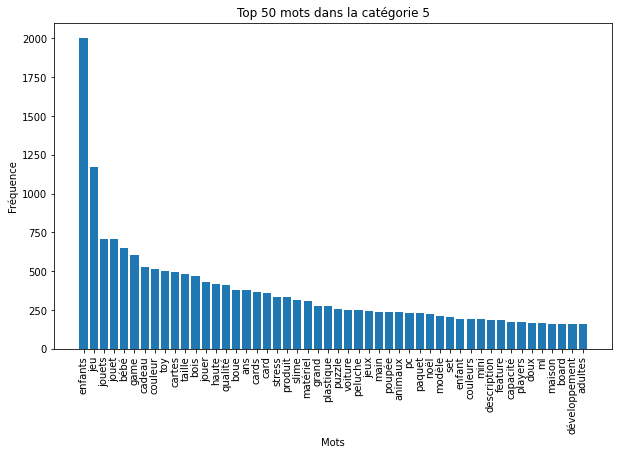

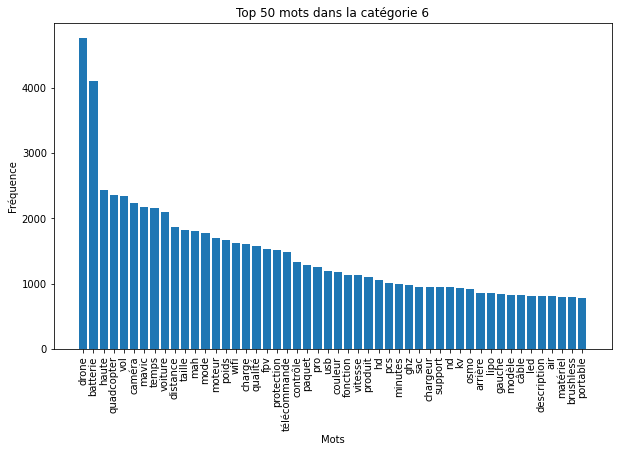

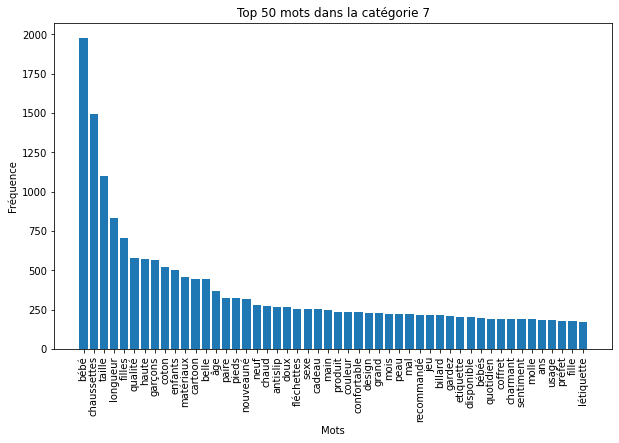

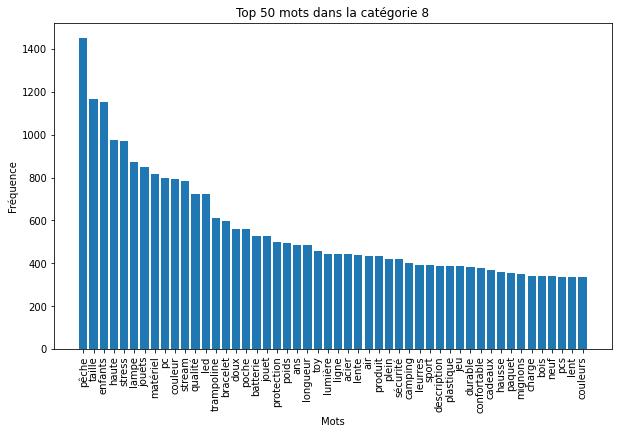

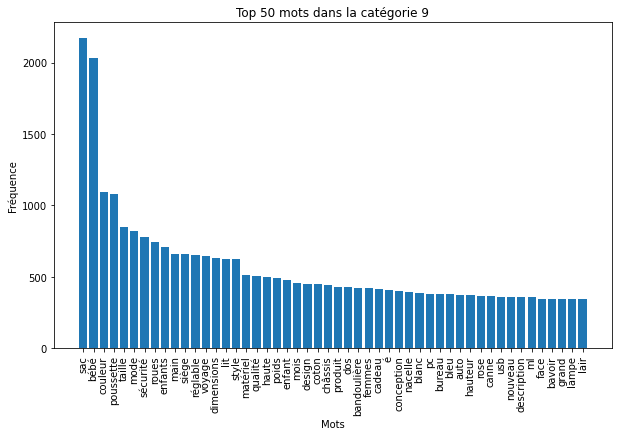

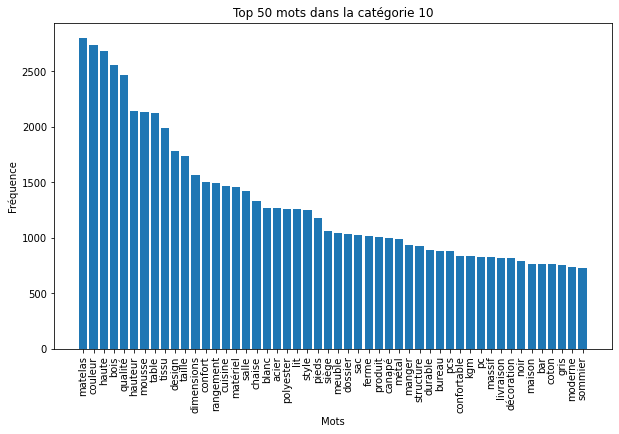

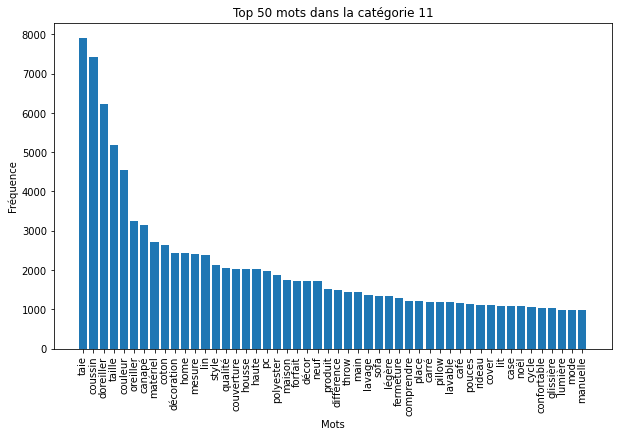

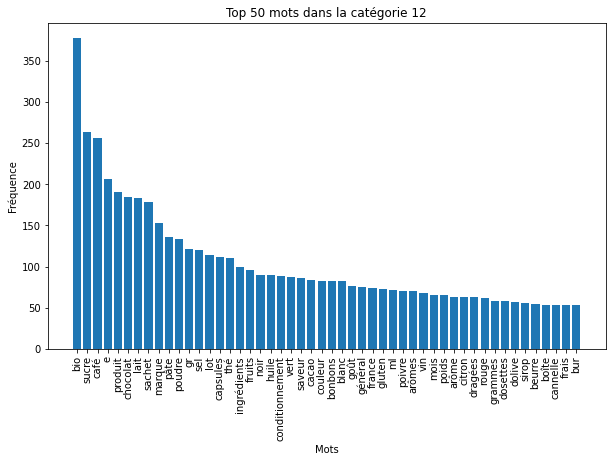

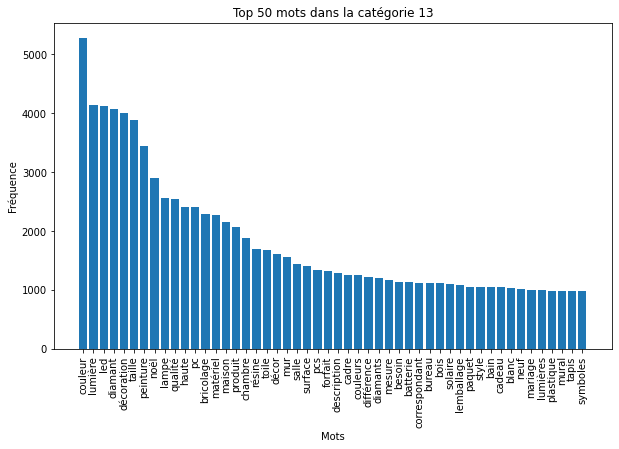

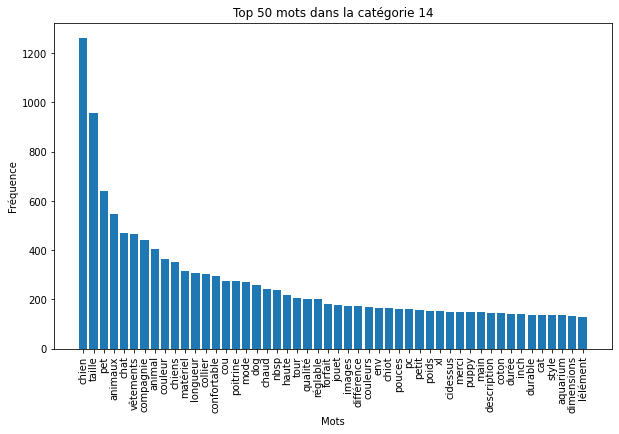

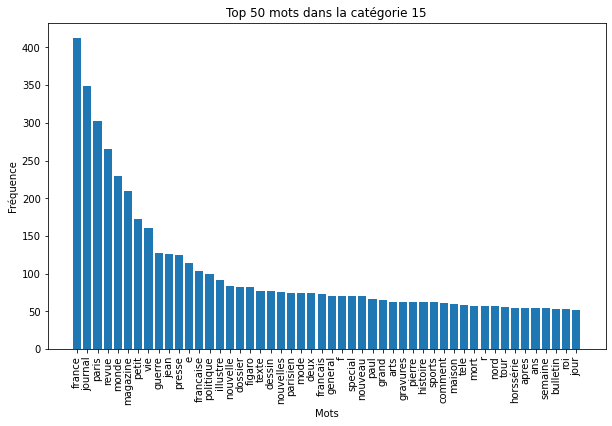

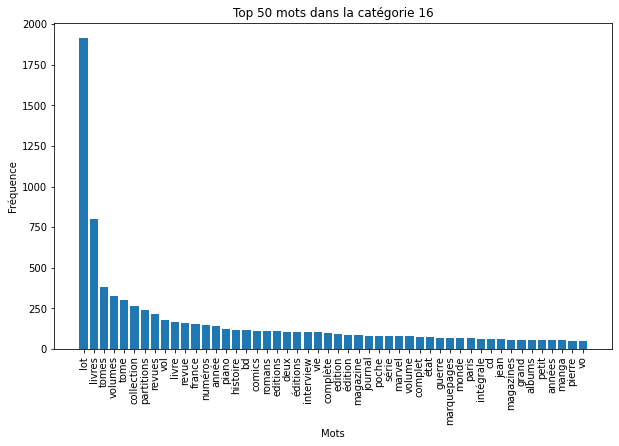

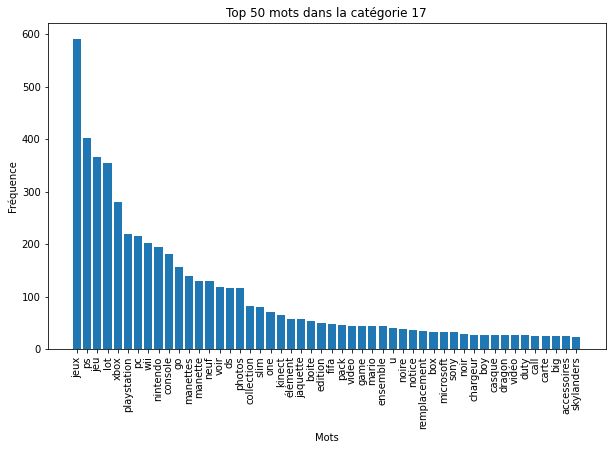

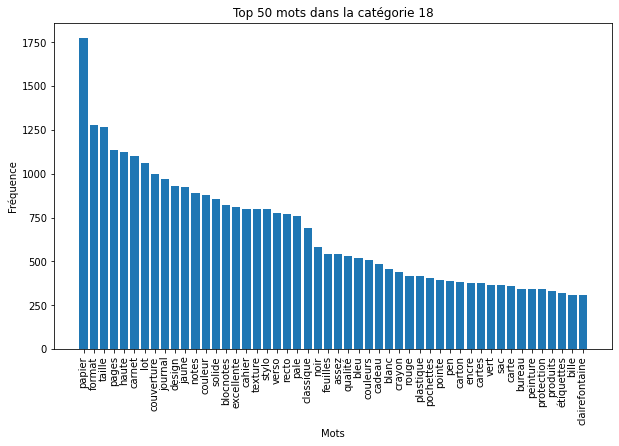

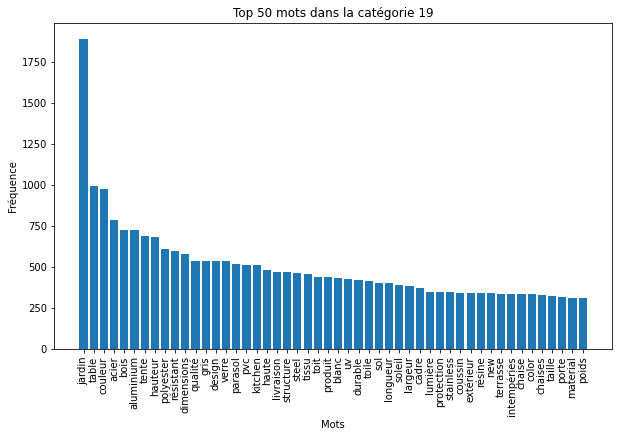

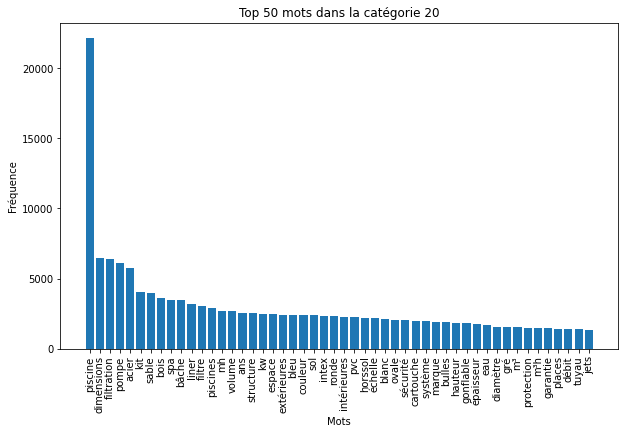

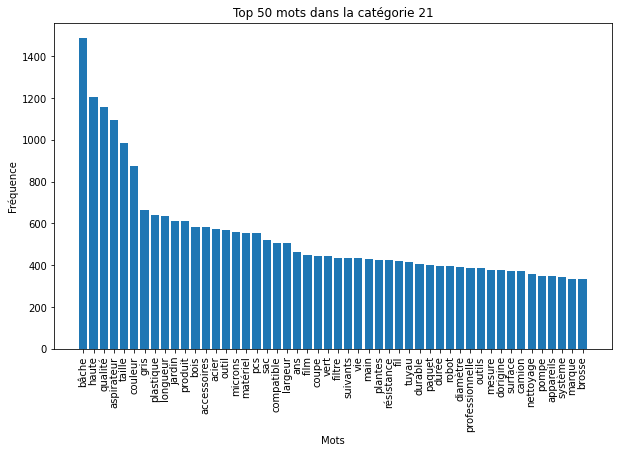

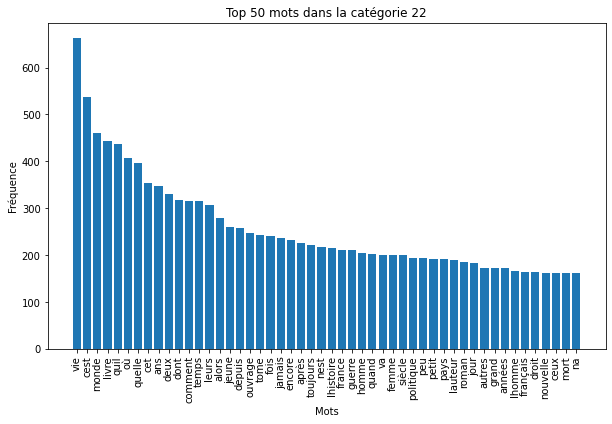

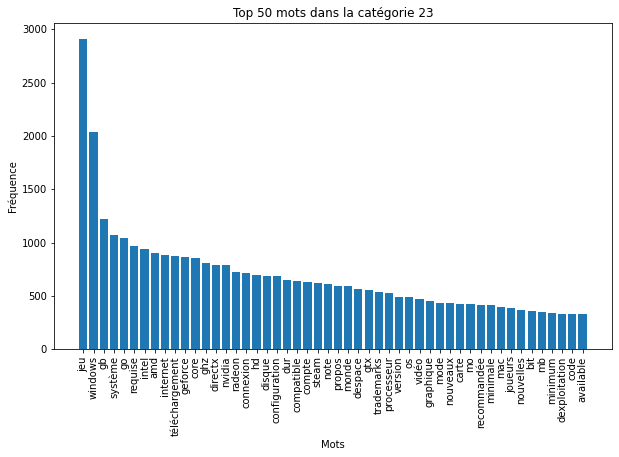

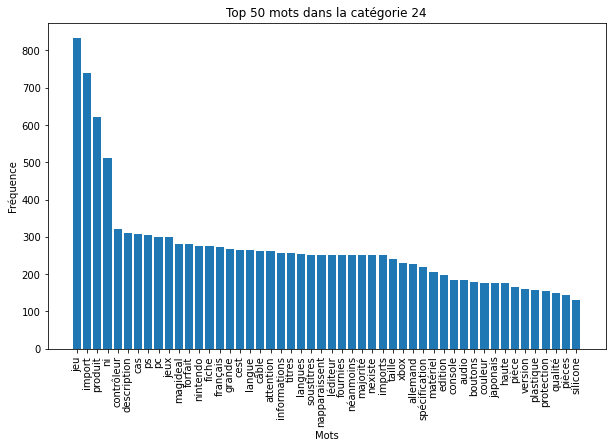

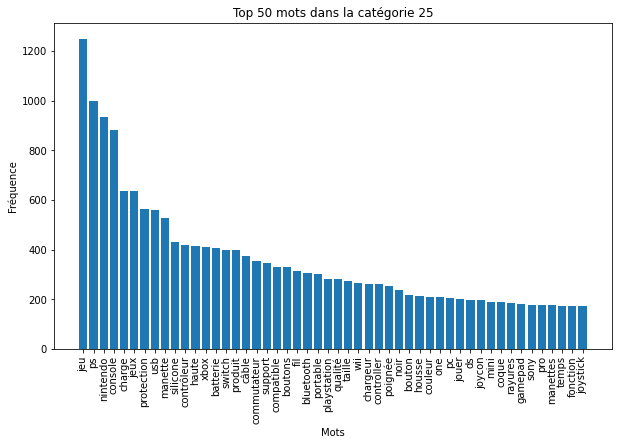

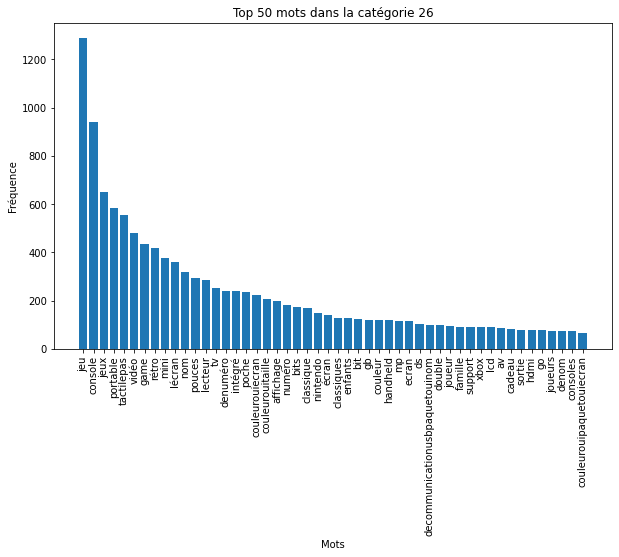

In [19]:
# Appliquer le filtrage pour chaque catégorie
word_counts_by_category = {}
for category, group in df.groupby('target'):
    all_tokens = [token for sublist in group['tokens'] for token in sublist]  # Concaténer les tokens de chaque texte
    word_counts_by_category[category] = Counter(all_tokens)  # Compter les mots restants

# Définir la fonction pour afficher les distributions
def plot_word_distribution(word_counts, category):
    words, counts = zip(*word_counts.most_common(50))  # Récupérer les mots et leurs fréquences
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts)
    plt.title(f"Top 50 mots dans la catégorie {category}")
    plt.xlabel("Mots")
    plt.ylabel("Fréquence")
    plt.xticks(rotation=90)  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
    plt.show()

# Afficher les distributions pour chaque catégorie
for category, word_counts in word_counts_by_category.items():
    plot_word_distribution(word_counts, category)

catégorie 0 = 10 Livres neufs
à filtrer : 'e', 'vendons', 'donnons', 'chez', 'jusqu'à', 'fournis'

catégorie 1 = 2280 Magazine kiosque
à filtrer : 'e', 'f', 'comment', 'r', 'après'

catégorie 2 = 50 Accessoires gaming
à filtrer : 'couleur', 'temps'

catéforie 3 = 1280 Jouet bébé/doudou
à filtrer : 'temps', 'description', 'nbsq', 'fonction'

catégorie 4 = 2705 Livres d'occasions
à filtrer : 'cest', 'quil', 'où', 'quelle', 'cet', 'dont', 'comment', 'leurs', 'alors', 'depuis', 'encore', 'après', 'toujours', 'nest', 'quand', 'va', 'peu', 'autres', 'ceux', 'na'

catgéorie 5 = 2522 Papétrie / fournisture de bureau
à filtrer : 'assez'

catégorie 6 = 2582 Mobilier de jardin
à filtrer : None

catégorie 7 = 1560 Meubles et fournitures
à filtrer : 'kgm'

catégorie 8 = 1281 Jeux enfants
à filtrer : 'feature', 'ml'

catégorie 9 = 1920 Literie
à filtrer : 'mesure', 'différence', 'throw', 'comprendre', 'pouces'

catégorie 10 = 2403 Collection / Lot livre
à filtrer : 'deux'

catégorie 11 = 1140 Produits dérivés / Goodies
à filtrer : 'env', 'qualité', 'import', 'matière', 'z', 'nbsp'

catégorie 12 = 2583 Piscines et accessoires
à filtrer : 'dimensions', mh', 'kw', 'marque', 'hauteur', 'm³', 'm³h'

catégorie 13 = 1180 Jeux de rôles et figurine
à filtrer : 'difference', 'oop', 'k', 'ml', 'add', 'br'

catégorie 14 = 1300 Modélisme / Objets télécommandés
à filtrer : 'temps', 'ghz', 'nd', 'kv', 'description', 'arrière'

catégorie 15 = 2462 Gaming occasion
à filtrer : 'voir', 'u'

catégorie 16 = 1160 Carte de jeu / à collectionner
à filtrer : 'r', 'xy', 'u', 'ex', z', 'yu', 'oh', 'gi'

catégorie 17 = 2060 Art déco / Bricolage
à filtrer : 'besoin', 'mesure', 'correspondant'

catégorie 18 = 40 A approfondir
à filtrer : 'ni', 'cest', 'informations', 'napparaissent', 'néanmoins', 'nexiste'

catégorie 19 = 60 Univers gaming
à filtrer : 'nom', gb', 'mp', 'denom'

catégorie 20 = 1320 Puériculture
à filtrer : 'é'

catgéorie 21 = 1302 Jeux d'extérieur
à filtrer : 

catégorie 22 = 2220 Animalerie
à filtrer : 'nbsp', 'env', 'cidessus', 'merci', 'inch', 'lélément'

catégorie 23 = 2905 Jeux vidéos dématérialisé
à filtrer : 'propos', 'mo', 'mb', 'available'

catégorie 24 = 2585 Outillage de jardin
à filtrer : 'suivants'

catégorie 25 = 1940 Epicerie
à filtrer : 'e', 'gr', 'ml', 'général'

catégorie 26 = 1301 Vêtements bébé / enfants / fille/ garçon
à filtrer : 'belle', 'gardez', 'disponible'


In [20]:
# Liste des mots à supprimer
words_to_remove = {'e', 'vendons', 'donnons', 'chez', 'jusquà', 'fournis', 'f', 'comment', 'r', 'après', 'couleur', 'temps', 'description', 'nbsq', 'fonction', 'cest', 'quil', 'où', 'quelle', 'cet', 'dont', 'comment', 'leurs', 'alors', 'depuis', 'encore', 'après', 'toujours', 'nest', 'quand', 'va', 'peu', 'autres', 'ceux', 'na', 'assez', 'kgm', 'feature', 'ml', 'mesure', 'différence', 'throw', 'comprendre', 'pouces', 'deux',  'env', 'qualité', 'import', 'matière', 'z', 'nbsp', 'dimensions', 'mh', 'kw', 'marque', 'hauteur', 'm³', 'm³h', 'difference', 'oop', 'k', 'ml', 'add', 'br', 'temps', 'ghz', 'nd', 'kv', 'description', 'arrière', 'voir', 'u', 'r', 'xy', 'u', 'ex', 'z', 'yu', 'oh', 'gi', 'besoin', 'mesure', 'correspondant', 'ni', 'cest', 'informations', 'napparaissent', 'néanmoins', 'nexiste', 'nom', 'gb', 'mp', 'denom', 'é', 'nbsp', 'env', 'cidessus', 'merci', 'inch', 'lélément', 'propos', 'mo', 'mb', 'available', 'suivants', 'gr', 'ml', 'général', 'belle', 'gardez', 'disponible'}

# Fonction pour supprimer les mots
def remove_words(tokens):
    return [token for token in tokens if token not in words_to_remove]

# Appliquer la fonction à la colonne 'tokens'
df['tokens'] = df['tokens'].apply(remove_words)

La liste finale des mots fréquents après la suppression des mots peu informatifs est très pertinente pour le contexte des descriptions de produits. Elle comprend des termes spécifiques qui sont susceptibles de contribuer de manière significative à la classification.

In [21]:
# Conversion de la colonne 'target' en entier
df['target'] = df['target'].astype(int)

# Vérification
df['target'].dtype

dtype('int32')

## Modele final sélectionné (seulement sur le texte) et Model sortant les embeddings pour le texte

In [22]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

# Préparation des données
tokenizer = Tokenizer(num_words=40000)
tokenizer.fit_on_texts(df['tokens'])
sequences = tokenizer.texts_to_sequences(df['tokens'])
df['padded_sequences'] = pad_sequences(sequences, maxlen=150).tolist()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84916 entries, 0 to 84915
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   designation       84916 non-null  object
 1   description       84916 non-null  object
 2   productid         84916 non-null  object
 3   imageid           84916 non-null  object
 4   target            84916 non-null  int32 
 5   text              84916 non-null  object
 6   tokens            84916 non-null  object
 7   padded_sequences  84916 non-null  object
dtypes: int32(1), object(7)
memory usage: 5.5+ MB


In [24]:
import pandas as pd

# Conversion des colonnes 'imageid' et 'productid' en int64 pour train_df
train_df['imageid'] = train_df['imageid'].astype('int64')
train_df['productid'] = train_df['productid'].astype('int64')

# Conversion des colonnes 'imageid' et 'productid' en int64 pour test_df
test_df['imageid'] = test_df['imageid'].astype('int64')
test_df['productid'] = test_df['productid'].astype('int64')

# Conversion des colonnes 'imageid' et 'productid' en int64 pour df
df['imageid'] = df['imageid'].astype('int64')
df['productid'] = df['productid'].astype('int64')

# On veut les mêmes colonnes que dans df (pour avoir toutes les data) mais en séparant dans deux dataframes les données des produits utilisés pour l'entrainement versus pour le test
# Ainsi nous utilisons le même split pour tous les entrainements de models, texte, images et model combinés.

# Création d'un filtre basé sur la présence des paires (imageid, productid) dans train_df
mask_train = df.set_index(['imageid', 'productid']).index.isin(train_df.set_index(['imageid', 'productid']).index)

# Création d'un filtre pour test_df de manière similaire
mask_test = df.set_index(['imageid', 'productid']).index.isin(test_df.set_index(['imageid', 'productid']).index)

# Application du filtre pour obtenir le split désiré
train_df_embeddings = df[mask_train].reset_index(drop=True)

# Application du filtre pour obtenir le split désiré
test_df_embeddings = df[mask_test].reset_index(drop=True)


print("Aperçu de new_train_df:")
print(train_df_embeddings.head())
print("\nAperçu de new_test_df:")
print(test_df_embeddings.head())


Aperçu de new_train_df:
                                         designation  \
0  Olivia: Personalisiertes Notizbuch / 150 Seite...   
1  Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...   
2  Grand Stylet Ergonomique Bleu Gamepad Nintendo...   
3  Peluche Donald - Europe - Disneyland 2000 (Mar...   
4                               La Guerre Des Tuques   

                                         description   productid     imageid  \
0                                                     3804725264  1263597046   
1                                                      436067568  1008141237   
2  PILOT STYLE Touch Pen de marque Speedlink est ...   201115110   938777978   
3                                                       50418756   457047496   
4  Luc a des id&eacute;es de grandeur. Il veut or...   278535884  1077757786   

   target                                               text  \
0       0  olivia personalisiertes notizbuch   seiten  pu...   
1      15  journal des arts le

In [25]:
train_df_embeddings.columns

Index(['designation', 'description', 'productid', 'imageid', 'target', 'text',
       'tokens', 'padded_sequences'],
      dtype='object')

In [26]:
test_df_embeddings.columns

Index(['designation', 'description', 'productid', 'imageid', 'target', 'text',
       'tokens', 'padded_sequences'],
      dtype='object')

### Model texte (qui est aussi le modèle global sélectionné) et model sortant les embeddings pour le texte

In [27]:

# Conversion des listes en numpy array pour l'entraînement
X_train = np.array(train_df_embeddings['padded_sequences'].tolist())
y_train = train_df_embeddings['target'].values
X_test = np.array(test_df_embeddings['padded_sequences'].tolist())
y_test = test_df_embeddings['target'].values

# Configuration du modèle
input_layer = Input(shape=(150,)) # puisque padded_sequences est d'une longueur de 150
embedding_layer = Embedding(input_dim=40000, output_dim=300, input_length=150)(input_layer) #input_dim=40000 car le tokenizer était dimenssionné à 40000 mots
pooling_layer = GlobalMaxPooling1D()(embedding_layer)
dropout_layer = Dropout(0.5)(pooling_layer)
dense_layer = Dense(50, name="dense_layer", activation='relu')(dropout_layer)
output_classifier = Dense(len(np.unique(y_train)), activation='softmax')(dense_layer)

# Création et compilation du modèle
model = Model(inputs=input_layer, outputs=output_classifier)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=20, batch_size=2000, validation_data=(X_test, y_test), verbose=1)

# Création du modèle pour extraction des embeddings
embedding_model = Model(inputs=model.input, outputs=model.get_layer('dense_layer').output)

c:\Users\tgp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 150, 300)       │    12,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 300)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer (Dense)             │ (None, 50)             │        15,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 27)             │         1,377 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,016,427 (45.84 MB)

 Trainable params: 12,016,427 (45.84 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 18s 515ms/step - accuracy: 0.1007 - loss: 3.1398 - val_accuracy: 0.1748 - val_loss: 2.7377
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 489ms/step - accuracy: 0.2923 - loss: 2.6019 - val_accuracy: 0.4943 - val_loss: 2.1387
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 16s 485ms/step - accuracy: 0.4974 - loss: 2.0157 - val_accuracy: 0.6079 - val_loss: 1.6011
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 17s 490ms/step - accuracy: 0.6223 - loss: 1.5141 - val_accuracy: 0.6839 - val_loss: 1.2488
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 16s 476ms/step - accuracy: 0.6998 - loss: 1.1811 - val_accuracy: 0.7262 - val_loss: 1.0441
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 16s 480ms/step - accuracy: 0.7482 - loss: 0.9747 - val_accuracy: 0.7521 - val_loss: 0.9186
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 16s 479ms/step - accuracy: 0.7888 - loss: 0.8085 - val_accuracy: 0.7684 - val_loss: 0.8379
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 17s 484ms/step - accuracy: 0.8103 - loss: 0.7139 - val_accu

#### Evaluation du model

In [28]:
from tensorflow.keras.metrics import CategoricalAccuracy, Precision, Recall
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Évaluation du modèle
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

# Prédiction des classes pour les données de test
y_pred = model.predict(X_test)
# Conversion des probabilités de classe en labels de classe
y_pred_classes = np.argmax(y_pred, axis=1)  

# Vérification de l'alignement des formes
if y_test.ndim == 2:
    y_test = np.argmax(y_test, axis=1)

# Rapport de classification
print(classification_report(y_test, y_pred_classes))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

531/531 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8143 - loss: 0.6600
Test Loss: 0.6663083434104919
Test Accuracy: 0.8133537173271179
531/531 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
              precision    recall  f1-score   support

           0       0.51      0.54      0.52       612
           1       0.73      0.79      0.76       539
           2       0.93      0.92      0.93       786
           3       0.62      0.62      0.62       146
           4       0.68      0.62      0.65       961
           5       0.59      0.55      0.57       424
           6       0.84      0.92      0.88       974
           7       0.93      0.89      0.91       169
           8       0.87      0.82      0.84       507
           9       0.87      0.76      0.81       672
          10       0.82      0.85      0.84      1013
          11       0.92      0.94      0.93       841
          12       0.91      0.88      0.89       137
          13       0.81      0.82      0.81      1029
         

#### Extraction des embeddings

embeddings pour le dataset de test du texte

In [29]:
def predict_in_batches(model, data, batch_size=1024):
    num_samples = len(data)
    predictions = []
    
    for start in range(0, num_samples, batch_size):
        end = min(start + batch_size, num_samples)
        batch_predictions = model.predict(data[start:end])
        predictions.append(batch_predictions)
    
    return np.vstack(predictions)

# Generation des embeddings par batch
test_embeddings_text = predict_in_batches(embedding_model, X_test, batch_size=2048)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [30]:
# Ajout des identifiants de produit ('productid' ou 'imageid')
test_embeddings_text = pd.DataFrame(test_embeddings_text)
test_embeddings_text['productid'] = test_df_embeddings['productid']  
test_embeddings_text['imageid'] = test_df_embeddings['imageid']

In [31]:
X_t = pd.read_csv('../../X_train.csv', index_col=0)
y_t = pd.read_csv("../../Y_train.csv", index_col=0)
df = pd.concat([X_t, y_t], axis=1)
df.columns

Index(['designation', 'description', 'productid', 'imageid', 'prdtypecode'], dtype='object')

In [32]:
test_productids = test_embeddings_text['productid'].values
y_test_final = df[df['productid'].isin(test_productids)].sort_values(by='productid')['prdtypecode']

In [33]:
image_embeddings_train = pd.read_csv('./final_image_train_embeddings.csv', index_col=0)
image_embeddings_test = pd.read_csv("./final_image_test_embeddings.csv", index_col=0)

In [34]:
test_embeddings_text = test_embeddings_text.sort_values(by='productid')
print(test_embeddings_text['productid'].head())

10388    184388
9001     184752
13830    189457
6449     217300
1490     247522
Name: productid, dtype: int64


In [35]:
image_embeddings_test = image_embeddings_test.sort_values(by='productid')
print(image_embeddings_test['productid'].head())

16197    184388
16147    184752
9618     189457
526      217300
225      247522
Name: productid, dtype: int64


In [36]:
# Réinitialisation des index des deux DataFrames
test_embeddings_text.reset_index(drop=True, inplace=True)
image_embeddings_test.reset_index(drop=True, inplace=True)

# Comparaison des identifiants de produit
if (test_embeddings_text['productid'] == image_embeddings_test['productid']).all():
    print("Les identifiants des produits correspondent")
else:
    print("Les identifiants des produits ne correspondent pas")

Les identifiants des produits correspondent


In [37]:
# Generation des embeddings par batch
train_embeddings_text = predict_in_batches(embedding_model, X_train, batch_size=2048)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
64/64 ━━━━━━━━━━━━━━━━━━━

In [38]:
# Ajout des identifiants de produit ('productid' ou 'imageid')
train_embeddings_text = pd.DataFrame(train_embeddings_text)
train_embeddings_text['productid'] = train_df_embeddings['productid']  
train_embeddings_text['imageid'] = train_df_embeddings['imageid']

In [39]:
train_productids = train_embeddings_text['productid'].values
y_train_final = df[df['productid'].isin(train_productids)].sort_values(by='productid')['prdtypecode']

In [40]:
train_embeddings_text = train_embeddings_text.sort_values(by='productid')
print(train_embeddings_text['productid'].head())

24210    183912
51772    184080
51907    184251
5024     184334
24536    184381
Name: productid, dtype: int64


In [41]:
image_embeddings_train = image_embeddings_train.sort_values(by='productid')
print(image_embeddings_train['productid'].head())

3     183912
2     184080
10    184251
22    184334
21    184381
Name: productid, dtype: int64


In [42]:
# Réinitialisation des index des deux DataFrames
train_embeddings_text.reset_index(drop=True, inplace=True)
image_embeddings_train.reset_index(drop=True, inplace=True)

# Comparaison des identifiants de produit
if (train_embeddings_text['productid'] == image_embeddings_train['productid']).all():
    print("Les identifiants des produits correspondent")
else:
    print("Les identifiants des produits ne correspondent pas")

Les identifiants des produits correspondent


In [43]:
image_embeddings_test = image_embeddings_test.drop(columns=['imageid','productid'])
image_embeddings_test = image_embeddings_test.to_numpy()
image_embeddings_train = image_embeddings_train.drop(columns=['imageid','productid'])
image_embeddings_train = image_embeddings_train.to_numpy()

test_embeddings_text = test_embeddings_text.drop(columns=['imageid','productid'])
test_embeddings_text = test_embeddings_text.to_numpy()
train_embeddings_text = train_embeddings_text.drop(columns=['imageid','productid'])
train_embeddings_text = train_embeddings_text.to_numpy()

checking du résultat:

In [44]:
import numpy as np

def numpy_info(array):
    print("Array Information:")
    print("Data type:", array.dtype)
    print("Shape:", array.shape)
    print("Size:", array.size)
    print("Number of dimensions:", array.ndim)
    print("Size of each item:", array.itemsize, "bytes")
    print("Total size:", array.nbytes, "bytes")


In [45]:
numpy_info(image_embeddings_test)
print("")
print("# # # # # # # # # # # # # # #")
print("")
numpy_info(test_embeddings_text)

Array Information:
Data type: float64
Shape: (16984, 768)
Size: 13043712
Number of dimensions: 2
Size of each item: 8 bytes
Total size: 104349696 bytes

# # # # # # # # # # # # # # #

Array Information:
Data type: float32
Shape: (16984, 50)
Size: 849200
Number of dimensions: 2
Size of each item: 4 bytes
Total size: 3396800 bytes


In [46]:
numpy_info(image_embeddings_train)
print("")
print("# # # # # # # # # # # # # # #")
print("")
numpy_info(train_embeddings_text)

Array Information:
Data type: float64
Shape: (67932, 768)
Size: 52171776
Number of dimensions: 2
Size of each item: 8 bytes
Total size: 417374208 bytes

# # # # # # # # # # # # # # #

Array Information:
Data type: float32
Shape: (67932, 50)
Size: 3396600
Number of dimensions: 2
Size of each item: 4 bytes
Total size: 13586400 bytes


## Modèle combinant les embeddings

In [47]:
image_embeddings_train = image_embeddings_train.astype('float32')
image_embeddings_test = image_embeddings_test.astype('float32')

In [48]:
classe_images = pd.read_csv('class_images_mapping.csv')

# dictionnaire de correspondance entre les valeurs de "Class Name" et "Label"
mapping_dict = dict(zip(classe_images['Class Name'], classe_images['Label']))

# ajustement des valeurs dans y_train
y_train_final_mapped = np.array([mapping_dict[class_name] for class_name in y_train_final])

# Afficher les 5 premières valeurs pour vérification
print(y_train_final_mapped[:5])


[24 24 24 24 24]


In [49]:
classe_images = pd.read_csv('class_images_mapping.csv')

# dictionnaire de correspondance entre les valeurs de "Class Name" et "Label"
mapping_dict = dict(zip(classe_images['Class Name'], classe_images['Label']))

# ajustement des valeurs dans y_train
y_test_final_mapped = np.array([mapping_dict[class_name] for class_name in y_test_final])

# Afficher les 5 premières valeurs pour vérification
print(y_test_final_mapped[:5])


[24 24 15  0  0]


In [50]:
y_train_final.head()

30199    40
64743    40
64904    40
6218     40
30591    40
Name: prdtypecode, dtype: int64

In [63]:
import tensorflow as tf
from keras.layers import Input, Dense, Flatten, concatenate, Dropout, Activation, Reshape
from keras.models import Model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Attention

y_train_categorical = y_train_final_mapped
y_test_categorical = y_test_final_mapped

# Nombre de classes
num_classes = 27

# EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
# Réduction dynamique du taux d'apprentissage
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

# Branche pour les embeddings d'image
input_img = Input(shape=(768,))
img_branch = Dense(256, activation='relu')(input_img)
img_branch = Dropout(0.3)(img_branch)
img_branch = Dense(128, activation='relu')(img_branch)
img_branch = Dropout(0.3)(img_branch)
img_branch = Dense(64, activation='relu')(img_branch)

# Branche pour les embeddings de texte
input_txt = Input(shape=(50,))
txt_branch = Dense(128, activation='relu')(input_txt)
txt_branch = Dropout(0.3)(txt_branch)
txt_branch = Dense(128, activation='relu')(txt_branch)
txt_branch = Dropout(0.3)(txt_branch)
txt_branch = Dense(64, activation='relu')(txt_branch)

# Concaténation des deux branches
combined = concatenate([img_branch, txt_branch])
combined = Dense(256, activation='relu')(combined)
combined = Dropout(0.3)(combined)
combined = Dense(128, activation='relu')(combined)

# Couches denses finales
output = Dense(num_classes, activation='softmax')(combined)

model = Model(inputs=[input_img, input_txt], outputs=output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Résumé du modèle
model.summary()



Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 768)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_10      │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_34 (Dense)    │ (None, 256)       │    196,864 │ input_layer_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_37 (Dense)    │ (None, 128)       │      6,528 │ input_layer_10[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_19          │ (None, 256)       │          0 │ dense_34[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_21          │ (None, 128)       │          0 │ dense_37[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_35 (Dense)    │ (None, 128)       │     32,896 │ dropout_19[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_38 (Dense)    │ (None, 128)       │     16,512 │ dropout_21[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_20          │ (None, 128)       │          0 │ dense_35[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_22          │ (None, 128)       │          0 │ dense_38[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_36 (Dense)    │ (None, 64)        │      8,256 │ dropout_20[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_39 (Dense)    │ (None, 64)        │      8,256 │ dropout_22[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 128)       │          0 │ dense_36[0][0],   │
│ (Concatenate)       │                   │            │ dense_39[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_40 (Dense)    │ (None, 256)       │     33,024 │ concatenate_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_23          │ (None, 256)       │          0 │ dense_40[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_41 (Dense)    │ (None, 128)       │     32,896 │ dropout_23[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_42 (Dense)    │ (None, 27)        │      3,483 │ dense_41[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 338,715 (1.29 MB)

 Trainable params: 338,715 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

In [64]:
# Entraînement du modèle
history = model.fit([image_embeddings_train, train_embeddings_text], y_train_categorical, epochs=25, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

Epoch 1/25
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.7305 - loss: 0.9646 - val_accuracy: 0.9326 - val_loss: 0.2443 - learning_rate: 0.0010
Epoch 2/25
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.9340 - loss: 0.2379 - val_accuracy: 0.9317 - val_loss: 0.2457 - learning_rate: 0.0010
Epoch 3/25
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9433 - loss: 0.2018 - val_accuracy: 0.9397 - val_loss: 0.2270 - learning_rate: 0.0010
Epoch 4/25
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9466 - loss: 0.1969 - val_accuracy: 0.9408 - val_loss: 0.2402 - learning_rate: 0.0010
Epoch 5/25
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9480 - loss: 0.1854 - val_accuracy: 0.9416 - val_loss: 0.2038 - learning_rate: 0.0010
Epoch 6/25
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.9511 - loss: 0.1822 - val_accuracy: 0.9466 - val_loss: 0.1967 - learning_rate: 0.0010
Epoch 7/25
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accura

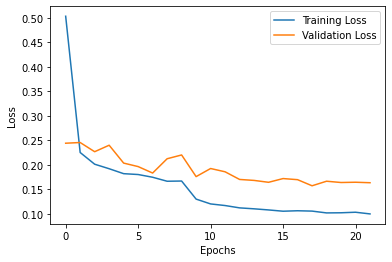

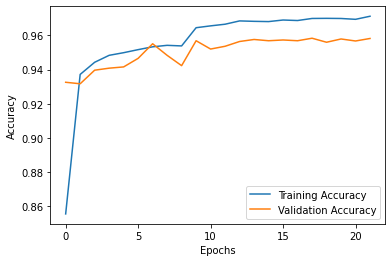

531/531 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7734 - loss: 1.1626
Test Loss: 0.911560595035553
Test Accuracy: 0.8135303854942322
531/531 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


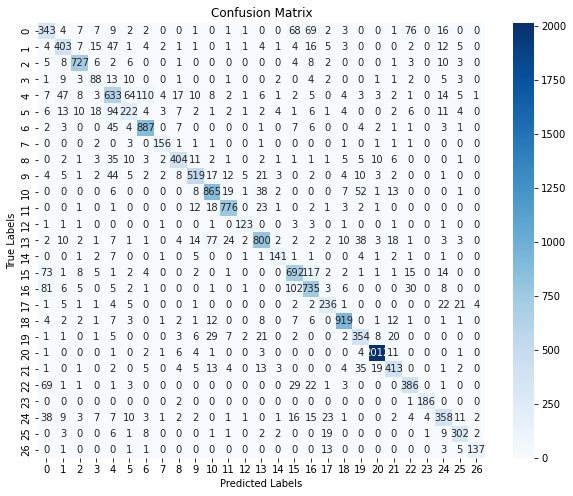

              precision    recall  f1-score   support

           0       0.53      0.56      0.55       612
           1       0.75      0.75      0.75       539
           2       0.92      0.92      0.92       786
           3       0.54      0.60      0.57       146
           4       0.64      0.66      0.65       961
           5       0.63      0.52      0.57       424
           6       0.86      0.91      0.88       974
           7       0.90      0.92      0.91       169
           8       0.86      0.80      0.83       507
           9       0.86      0.77      0.81       672
          10       0.83      0.85      0.84      1013
          11       0.91      0.92      0.92       841
          12       0.88      0.90      0.89       137
          13       0.85      0.78      0.81      1029
          14       0.86      0.83      0.84       170
          15       0.73      0.73      0.73       942
          16       0.72      0.75      0.73       986
          17       0.75    

In [65]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Affichage des courbes de perte et d'accuracy
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Évaluation sur l'ensemble de test
loss, accuracy = model.evaluate([image_embeddings_test, test_embeddings_text], y_test_categorical)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Prédictions sur l'ensemble de test
y_pred = model.predict([image_embeddings_test, test_embeddings_text])
y_pred_classes = np.argmax(y_pred, axis=1)

# Matrice de confusion
conf_matrix = confusion_matrix(y_test_categorical, y_pred_classes)

# Affichage de la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Rapport de classification
print(classification_report(y_test_categorical, y_pred_classes))

# F1-score par classe
f1_scores = f1_score(y_test_categorical, y_pred_classes, average=None)
print(f'F1-Score per class: {f1_scores}')

In [54]:
model.save('model_final_full.h5')

## Best SGD

In [103]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, concatenate, BatchNormalization, Activation, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD

# Configuration initiale
num_classes = 27
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

# Branche pour les embeddings d'image
input_img = Input(shape=(768,))
img_branch = Dense(256)(input_img)
img_branch = BatchNormalization()(img_branch)
img_branch = Activation('relu')(img_branch)
img_branch = Dropout(0.2)(img_branch)
img_branch = Dense(128)(img_branch)
img_branch = BatchNormalization()(img_branch)
img_branch = Activation('relu')(img_branch)
img_branch = Dropout(0.2)(img_branch)
img_branch = Dense(64)(img_branch)
img_branch = BatchNormalization()(img_branch)
img_branch = Activation('relu')(img_branch)

# Branche pour les embeddings de texte
input_txt = Input(shape=(50,))
txt_branch = Dense(128)(input_txt)
txt_branch = BatchNormalization()(txt_branch)
txt_branch = Activation('relu')(txt_branch)
txt_branch = Dropout(0.2)(txt_branch)
txt_branch = Dense(128)(txt_branch)
txt_branch = BatchNormalization()(txt_branch)
txt_branch = Activation('relu')(txt_branch)
txt_branch = Dropout(0.2)(txt_branch)
txt_branch = Dense(64)(txt_branch)
txt_branch = BatchNormalization()(txt_branch)
txt_branch = Activation('relu')(txt_branch)

# Concaténation des deux branches
combined = concatenate([img_branch, txt_branch])
combined = Dense(256)(combined)
combined = BatchNormalization()(combined)
combined = Activation('relu')(combined)
combined = Dropout(0.2)(combined)
combined = Dense(128)(combined)
combined = BatchNormalization()(combined)
combined = Activation('relu')(combined)
combined = Dropout(0.2)(combined)

# Couches denses finales
output = Dense(num_classes, activation='softmax')(combined)

model = Model(inputs=[input_img, input_txt], outputs=output)

# Configuration de SGD avec momentum
sgd_optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Résumé du modèle
model.summary()


Model: "functional_55"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_52      │ (None, 768)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_53      │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_223 (Dense)   │ (None, 256)       │    196,864 │ input_layer_52[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_226 (Dense)   │ (None, 128)       │      6,528 │ input_layer_53[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_223[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_226[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_40       │ (None, 256)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_43       │ (None, 128)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_126         │ (None, 256)       │          0 │ activation_40[0]… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_128         │ (None, 128)       │          0 │ activation_43[0]… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_224 (Dense)   │ (None, 128)       │     32,896 │ dropout_126[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_227 (Dense)   │ (None, 128)       │     16,512 │ dropout_128[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_224[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_227[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_41       │ (None, 128)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_44       │ (None, 128)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_127         │ (None, 128)       │          0 │ activation_41[0]… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_129         │ (None, 128)       │          0 │ activation_44[0]… │
│ (Dropout)           │                   │            │                 

 Total params: 343,323 (1.31 MB)

 Trainable params: 341,019 (1.30 MB)

 Non-trainable params: 2,304 (9.00 KB)

In [104]:
# Entraînement du modèle
history = model.fit([image_embeddings_train, train_embeddings_text], y_train_categorical, epochs=35, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

Epoch 1/35
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8219 - loss: 0.6670 - val_accuracy: 0.9307 - val_loss: 0.2267 - learning_rate: 0.0100
Epoch 2/35
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - accuracy: 0.9384 - loss: 0.2143 - val_accuracy: 0.9501 - val_loss: 0.1754 - learning_rate: 0.0100
Epoch 3/35
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9465 - loss: 0.1824 - val_accuracy: 0.9257 - val_loss: 0.2601 - learning_rate: 0.0100
Epoch 4/35
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9526 - loss: 0.1653 - val_accuracy: 0.9522 - val_loss: 0.1671 - learning_rate: 0.0100
Epoch 5/35
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9528 - loss: 0.1576 - val_accuracy: 0.9410 - val_loss: 0.1969 - learning_rate: 0.0100
Epoch 6/35
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9538 - loss: 0.1577 - val_accuracy: 0.9544 - val_loss: 0.1670 - learning_rate: 0.0100
Epoch 7/35
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy:

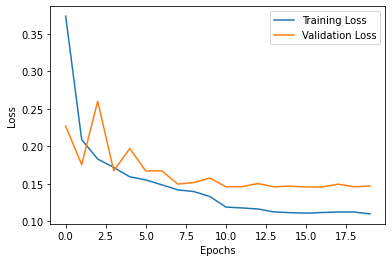

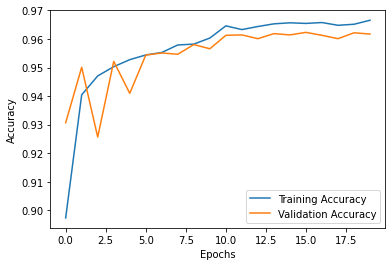

531/531 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7953 - loss: 0.9692
Test Loss: 0.7855430841445923
Test Accuracy: 0.8291921615600586
531/531 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


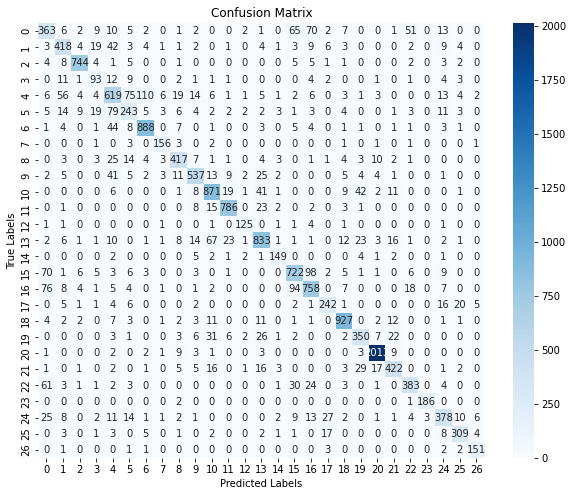

              precision    recall  f1-score   support

           0       0.58      0.59      0.59       612
           1       0.74      0.78      0.76       539
           2       0.95      0.95      0.95       786
           3       0.56      0.64      0.60       146
           4       0.66      0.64      0.65       961
           5       0.60      0.57      0.58       424
           6       0.86      0.91      0.89       974
           7       0.88      0.92      0.90       169
           8       0.83      0.82      0.83       507
           9       0.86      0.80      0.83       672
          10       0.83      0.86      0.85      1013
          11       0.92      0.93      0.93       841
          12       0.90      0.91      0.91       137
          13       0.83      0.81      0.82      1029
          14       0.87      0.88      0.87       170
          15       0.76      0.77      0.77       942
          16       0.75      0.77      0.76       986
          17       0.80    

In [105]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Affichage des courbes de perte et d'accuracy
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Évaluation sur l'ensemble de test
loss, accuracy = model.evaluate([image_embeddings_test, test_embeddings_text], y_test_categorical)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Prédictions sur l'ensemble de test
y_pred = model.predict([image_embeddings_test, test_embeddings_text])
y_pred_classes = np.argmax(y_pred, axis=1)

# Matrice de confusion
conf_matrix = confusion_matrix(y_test_categorical, y_pred_classes)

# Affichage de la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Rapport de classification
print(classification_report(y_test_categorical, y_pred_classes))

# F1-score par classe
f1_scores = f1_score(y_test_categorical, y_pred_classes, average=None)
print(f'F1-Score per class: {f1_scores}')